# Fourier Transform in numpy

First we will see how to find Fourier Transform using Numpy. Numpy has an FFT package to do this. np.fft.fft2() provides us the frequency transform which will be a complex array. Its first argument is the input image, which is grayscale. Second argument is optional which decides the size of output array. If it is greater than size of input image, input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped. If no arguments passed, Output array size will be same as input.

Now once you got the result, zero frequency component (DC component) will be at top left corner. If you want to bring it to center, you need to shift the result by N2 in both the directions. This is simply done by the function, np.fft.fftshift(). (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.

In [18]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

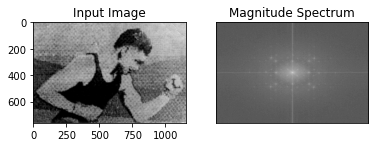

In [61]:
img = cv.imread('cp.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')


plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Invesre Transform

Finding inverse DFT, For that you simply remove the low frequencies by masking with a rectangular window of size 60x60. Then apply the inverse shift using np.fft.ifftshift() so that DC component again come at the top-left corner. Then find inverse FFT using np.ifft2() function. The result, again, will be a complex number. You can take its absolute value.

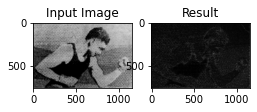

In [72]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

fshift[crow-30:crow+31, ccol-30:ccol+31] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
#img_back = np.real(img_back)
img_back = np.abs(img_back)

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')

plt.subplot(132)
plt.imshow(img_back, cmap = 'gray')
plt.title('Result')
plt.show()

# Fourier Transform in OpenCv

OpenCV provides the functions cv.dft() and cv.idft() for this. It returns the same result as previous, but with two channels. First channel will have the real part of the result and second channel will have the imaginary part of the result. The input image should be converted to np.float32 first.

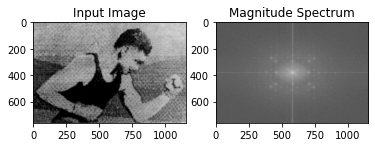

In [69]:
img = cv.imread('cp.tif',0)

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

# Inverse LPF(Low Pass Frequency)

So, now we have to do inverse DFT. In previous session, we created a HPF, this time we will see how to remove high frequency contents in the image, ie we apply LPF to image. It actually blurs the image. For this, we create a mask first with high value (1) at low frequencies, ie we pass the LF content, and 0 at HF region.

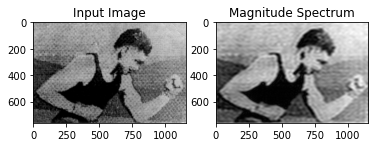

In [74]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)

img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

# Minor Changes showing that the Laplacian is a High Pass Frequency 

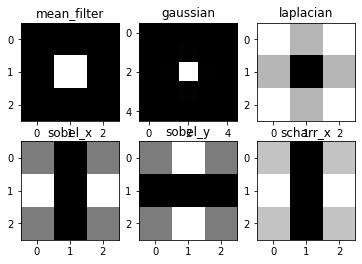

In [87]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction

scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])

# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']

fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i])
plt.show()